#### Importando as bibliotecas

In [123]:
# biblioteca para analise de dados
import pandas as pd

#### Carregando dados

In [124]:
# importando dados
data_train = pd.read_csv(r"C:\Projetos\HousePrices\data\train.csv")

# visualizando dados
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Exploração dos dados

In [125]:
# verificando a dimensão do arquivo
data_train.shape

(1460, 81)

In [126]:
# verificando os tipos de dados
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [127]:
# verificando total de valores nulos
data_train.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

In [128]:
# verificando total percentual de valores nulos
(data_train.isnull().sum()/data_train.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [129]:
# identificando colunas com mais de 10% de valores nulos
(data_train.isnull().sum()/data_train.shape[0]) > 0.1

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [130]:
# separando as colunas com  mais de 10% de valores nulos
data_train.columns[(data_train.isnull().sum()/data_train.shape[0]) > 0.1]

remove = data_train.columns[(data_train.isnull().sum()/data_train.shape[0]) > 0.1]

remove

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [131]:
# removendo colunas muitos valores nulos
data_train = data_train.drop(remove, axis=1)

In [132]:
# selecionando apenas as colunas numericas
numeric_data_train = data_train.columns[data_train.dtypes != "object"]
numeric_data_train

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [133]:
# criando nova base somente com colunas numericas
new_data_train = data_train.loc[:,numeric_data_train]
new_data_train.head(3)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500


In [135]:
# verificando valores nulos
new_data_train.isnull().sum().sort_values(ascending=False).head(5)

GarageYrBlt     81
MasVnrArea       8
Id               0
OpenPorchSF      0
KitchenAbvGr     0
dtype: int64

In [136]:
# substituindo valores nulos por -1
new_data_train = new_data_train.fillna(-1)

#### Separando dados de treino e validação

In [137]:
# selecionando X e y
X = new_data_train.drop('SalePrice', axis=1)
y = new_data_train.SalePrice

In [138]:
# importando o train_test_split
from sklearn.model_selection import train_test_split

In [139]:
# separando base de treino e validacao
X_train,  X_test,  y_train, y_test  =  train_test_split (X ,  y ,  test_size = 0.33 ,  random_state = 42)

#### Aplicando algoritmos

##### Regressão linear

In [141]:
# importando a regressão linear
from sklearn.linear_model import LinearRegression

In [142]:
# criando regressor e fazendo o fit
reg_rl = LinearRegression().fit(X_train, y_train)

In [143]:
# fazendo a precisao pros dados de teste
y_rl = reg_rl.predict(X_test)

##### Árvore de regressão

In [144]:
# importando a árvore de decisão
from sklearn import tree

In [145]:
# criando regressor e fazendo o fit
reg_ar = tree.DecisionTreeRegressor(random_state=42).fit(X_train, y_train)

In [146]:
# fazendo a precisao pros dados de teste
y_ar = reg_ar.predict(X_test)

##### KNN

In [147]:
# importando a KNN
from sklearn.neighbors import KNeighborsClassifier

In [148]:
# criando regressor e fazendo o fit
reg_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [149]:
# fazendo a precisao pros dados de teste
y_knn = reg_knn.predict(X_test)

#### Avaliação de erro dos algoritimos

In [151]:
# importando o erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [152]:
# Importando o erro quadrático médio
from sklearn.metrics import mean_squared_error

In [153]:
# avaliando o erro da regressão
print(mean_absolute_error(y_test, y_rl))
print(mean_squared_error(y_test, y_rl))

23763.187393064614
1533982883.4448636


In [154]:
# avaliando o erro da árvore de regressão
print(mean_absolute_error(y_test, y_ar))
print(mean_squared_error(y_test, y_ar))

27580.78838174274
2530245114.701245


In [155]:
# avaliando o erro do KNN
print(mean_absolute_error(y_test, y_knn))
print(mean_squared_error(y_test, y_knn))

43795.141078838176
4508421084.763486


In [158]:
# Importando o matplotlib
import matplotlib.pyplot as plt

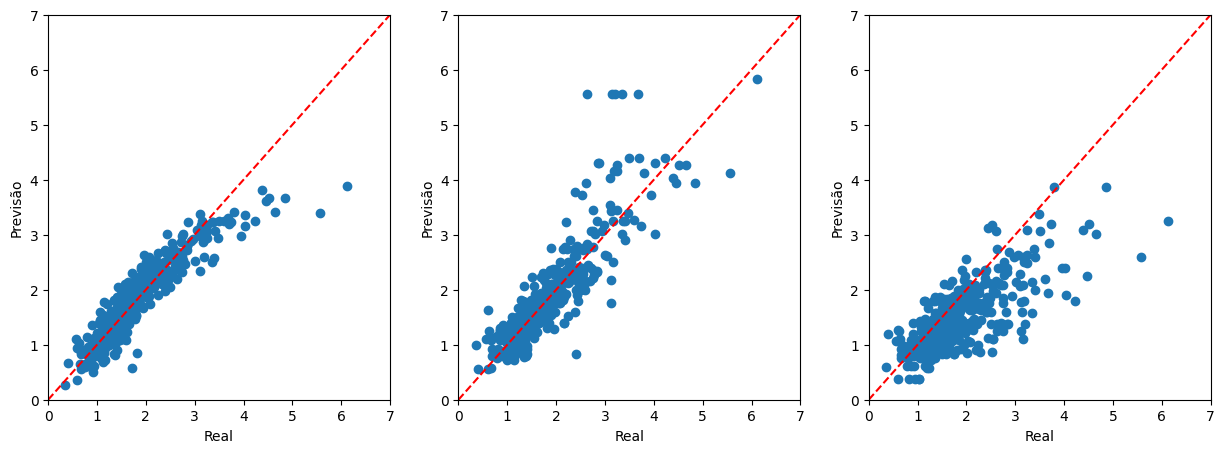

In [159]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000,y_rl/100000)
ax[0].plot([0,700000],[0,700000],'--r')
ax[1].scatter(y_test/100000,y_ar/100000)
ax[1].plot([0,700000],[0,700000],'--r')
ax[2].scatter(y_test/100000,y_knn/100000)
ax[2].plot([0,700000],[0,700000],'--r')

ax[0].set(xlim=(0, 7),ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[1].set(xlim=(0, 7),ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[2].set(xlim=(0, 7),ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')

plt.show()

#### Fazendo a previsão com base de teste

##### Carregamento e tratamento dos dados de teste

In [160]:
# importando dados
data_test = pd.read_csv(r"C:\Projetos\HousePrices\data\test.csv")

# visualizando dados
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [162]:
# Eliminando as mesmas colunas da base de treino
data_test = data_test.drop(remove,axis=1)

In [163]:
# selecionando apenas as colunas numericas
numeric_data_test = data_test.columns[data_test.dtypes != "object"]
numeric_data_test

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [164]:
# Mantendo também apenas as colunas numéricas
data_test = data_test.loc[:,numeric_data_test]

In [165]:
# Verificando a base restante
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [166]:
# Visualizando quantidade de valores vazios
data_test.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
dtype: int64

In [167]:
# Substituindo os valores vazios por -1
data_test = data_test.fillna(-1)

##### Fazendo as predições nos dados de teste

In [168]:
# Vamos usar a regressão linear para fazer a previsão
y_pred = reg_rl.predict(data_test)

In [169]:
# Podemos adicionar essa coluna de previsão na nossa base
data_test['SalePrice'] = y_pred

In [170]:
# E extrair somente o Id e o SalePrice
resultado = data_test[['Id','SalePrice']]
resultado.head(3)

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251


##### Exportando o arquivo final

In [172]:
# Podemos então exportar essa base
resultado.to_csv(r'C:\Projetos\HousePrices\data\resultado.csv',index=False)